# This notebook visualizes the census-reported ethnic composition of Seattle

In [1]:
# import necessary packages
# to graph with geopandas, you also need to install descartes
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt 

# to make nice looking legends
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Import Census Race Data

In [2]:
block_2010 = pd.read_csv('../data/nhgis0001_csv/nhgis0001_csv/nhgis0001_ds172_2010_block.csv')

In [3]:
block_2010.shape

(195574, 47)

In [4]:
king_blocks = block_2010.loc[block_2010['COUNTY'] == 'King County']

In [5]:
king_blocks.head().T

,49751,49752,49753,49754,49755
GISJOIN,G53003300001001000,G53003300001001001,G53003300001001002,G53003300001001003,G53003300001001004
YEAR,2010,2010,2010,2010,2010
REGIONA,4,4,4,4,4
DIVISIONA,9,9,9,9,9
STATE,Washington,Washington,Washington,Washington,Washington
STATEA,53,53,53,53,53
COUNTY,King County,King County,King County,King County,King County
COUNTYA,33,33,33,33,33
COUSUBA,92928,92928,92928,92928,92928
PLACEA,63000,63000,63000,63000,63000


## Import Census Shape Data

In [6]:
blocks_map_2010 = gpd.read_file('../data/nhgis0001_shape/nhgis0001_shape/nhgis0001_shapefile_tl2010_530_block_2010/WA_block_2010.shp')

In [7]:
blocks_map_2010.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,geometry
0,53,007,960500,5131,530079605005131,Block 5131,G5040,R,None,None,S,15098,0,+47.3574492,-120.6906056,G53000709605005131,15097.617247,728.454723,"POLYGON ((-1855188.829 1342660.682, -1855203.2..."
1,53,007,960500,5115,530079605005115,Block 5115,G5040,R,None,None,S,226958,0,+47.3722468,-120.5861253,G53000709605005115,226958.300227,6640.885674,"POLYGON ((-1845991.888 1340148.026, -1846009.0..."
2,53,007,960500,5141,530079605005141,Block 5141,G5040,R,None,None,S,20390,0,+47.3616961,-120.6935265,G53000709605005141,20390.215855,736.571616,"POLYGON ((-1855317.315 1343180.664, -1855318.9..."
3,53,007,960500,5170,530079605005170,Block 5170,G5040,R,None,None,S,28185,0,+47.3528672,-120.5683615,G53000709605005170,28185.255138,1546.898677,"POLYGON ((-1846689.003 1339760.039, -1846686.5..."
4,53,007,960500,5121,530079605005121,Block 5121,G5040,R,None,None,S,386583,0,+47.3410271,-120.5976108,G53000709605005121,386583.086743,6458.749710,"POLYGON ((-1847967.895 1338740.525, -1847965.5..."


In [8]:
cols = ['GISJOIN', 'H7X001', 'H7X002', 'H7X003', 'H7X004', 'H7X005','H7X006','H7X007','H7X008']

In [9]:
places = gpd.read_file('../data/cb_2018_53_place_500k/cb_2018_53_place_500k.shp')

In [10]:
places.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,53,14380,02413237,1600000US5314380,5314380,Concrete,43,3016773,53269,"POLYGON ((-121.76617 48.53769, -121.76610 48.5..."
1,53,64855,02413295,1600000US5364855,5364855,Skykomish,43,806007,56690,"MULTIPOLYGON (((-121.34921 47.71209, -121.3474..."
2,53,21485,02412478,1600000US5321485,5321485,Elmer City,43,615875,0,"POLYGON ((-118.95939 47.99828, -118.95356 48.0..."
3,53,33175,02412790,1600000US5333175,5333175,Index,43,533352,0,"POLYGON ((-121.56290 47.81756, -121.56287 47.8..."
4,53,09970,02413165,1600000US5309970,5309970,Carbonado,43,1079313,2545,"POLYGON ((-122.06108 47.08656, -122.05964 47.0..."


In [11]:
seattle = places[places['NAME'] == 'Seattle']

In [12]:
seattle

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
330,53,63000,02411856,1600000US5363000,5363000,Seattle,25,217197934,150755511,"POLYGON ((-122.43694 47.66172, -122.42551 47.6..."


<AxesSubplot:>

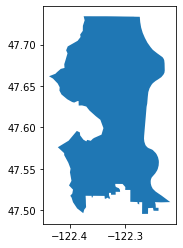

In [13]:
seattle.plot()

## Combine shape and race data

In [14]:
seattle_blocks = block_2010[block_2010['PLACEA'] == 63000]

In [15]:
seattle_blocks_map = blocks_map_2010.merge(seattle_blocks.loc[:, cols], 
                                           how='inner', 
                                           on='GISJOIN',
                                           validate='one_to_one')

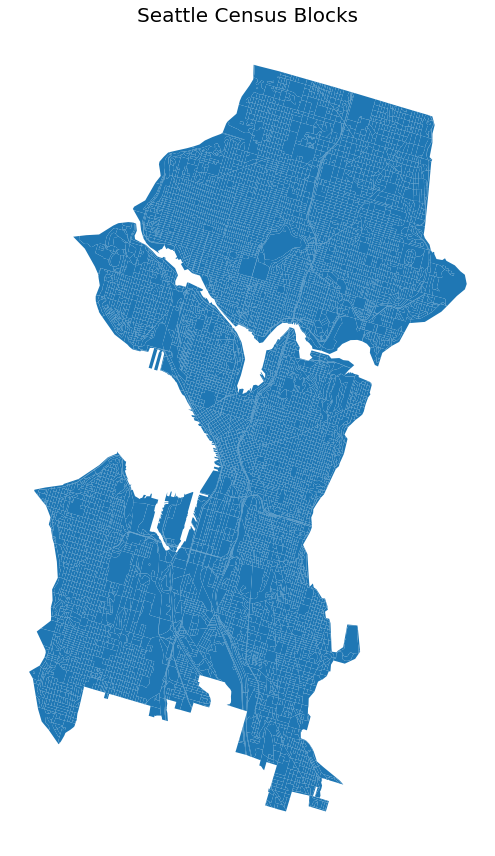

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
seattle_blocks_map.plot(ax=ax)
ax.set_title('Seattle Census Blocks', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()
plt.savefig('images/crs.png')

In [20]:
seattle.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
seattle_blocks_map = seattle_blocks_map.to_crs("EPSG:4269")

<AxesSubplot:>

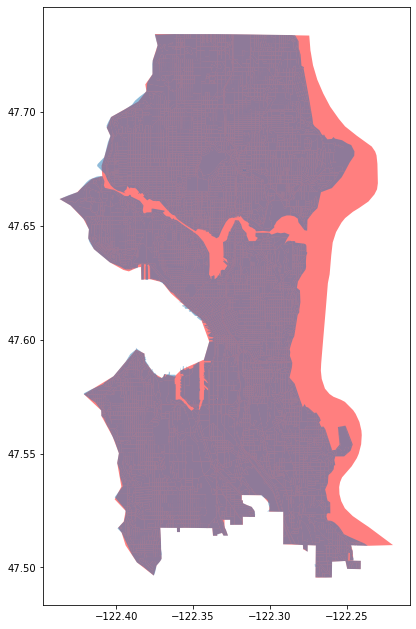

In [22]:
# visually checking relationship between the place map and census blocks
fig, ax = plt.subplots(figsize=(11,11))
seattle.plot(ax=ax, color='red', alpha=.5)
seattle_blocks_map.plot(ax=ax, alpha=.5)


## Plot Choropleth

#### Race/Ethnicity Codes:
        H7X001:      Total
        H7X002:      White alone
        H7X003:      Black or African American alone
        H7X004:      American Indian and Alaska Native alone
        H7X005:      Asian alone
        H7X006:      Native Hawaiian and Other Pacific Islander alone
        H7X007:      Some Other Race alone
        H7X008:      Two or More Races

In [23]:
seattle_blocks_map['white_rate'] = seattle_blocks_map['H7X002'] / seattle_blocks_map['H7X001']

In [24]:
seattle_outline = gpd.read_file('../data/Community_Reporting_Areas-shp/Community_Reporting_Areas.shp')

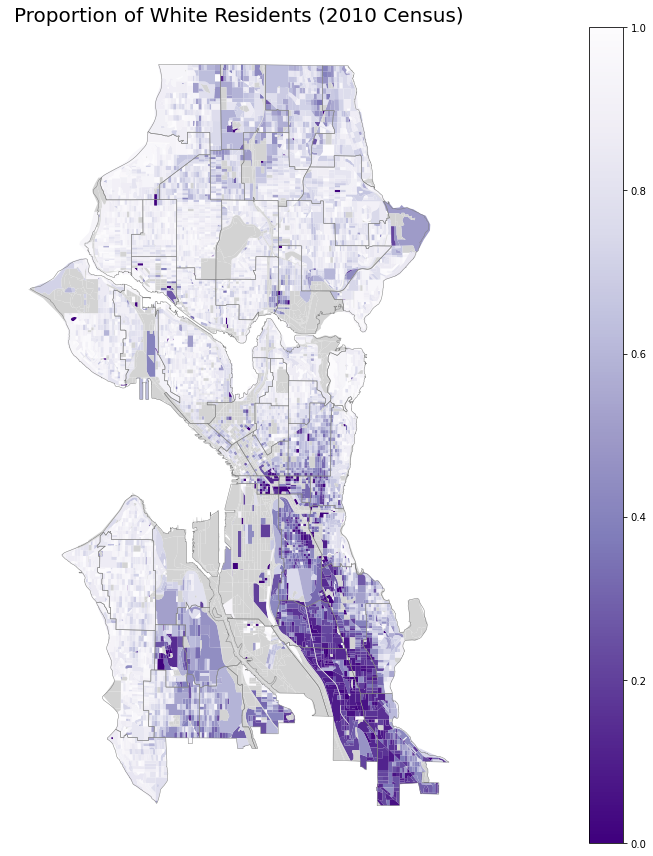

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
seattle_blocks_map.plot(ax=ax, 
                        column='white_rate', 
                        cmap='Purples_r',
                        legend=True, 
                        cax=cax,
                        missing_kwds={"color": "lightgrey"},
                       )
seattle_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.5)
ax.set_title('Proportion of White Residents (2010 Census)', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()
plt.savefig('images/choropleth.png')

## Generic Version for Any City

In [ ]:
# inputs
city_name = 'Spokane'
data_path = '../data/nhgis0001_csv/nhgis0001_csv/nhgis0001_ds172_2010_block.csv'
shape_path = '../data/nhgis0001_shape/nhgis0001_shape/nhgis0001_shapefile_tl2010_530_block_2010/WA_block_2010.shp'
places_path = '../data/cb_2018_53_place_500k/cb_2018_53_place_500k.shp'

In [ ]:
data = pd.read_csv(data_path)
shapes = gpd.read_file(shape_path)
places = gpd.read_file(places_path)

place_info = places[places['NAME'] == city_name]
city_blocks = data[data['PLACEA'] == place_info['PLACEFP']]


cols = ['GISJOIN', 'H7X001', 'H7X002', 'H7X003', 'H7X004', 'H7X005','H7X006','H7X007','H7X008']